In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:/Users/chara/Downloads/ifood_df.csv')

# Remove duplicates
df = df.drop_duplicates()

# Fix negative values in 'MntRegularProds'
df['MntRegularProds'] = df['MntRegularProds'].apply(lambda x: max(x, 0))

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Calculate Total Money Spent (if not already present)
df['MntTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Optional: Display the first few rows to confirm everything looks good
print(df.head())


Missing values:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds      

In [2]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = [
    'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'MntTotal'
]

# Ensure the selected features exist in the dataframe
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"Warning: The following features are missing from the dataset: {missing_features}")
else:
    # Normalize features
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(df[features])
    print("Features normalized successfully.")


Features normalized successfully.


C:\Users\chara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\chara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\chara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\chara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Window

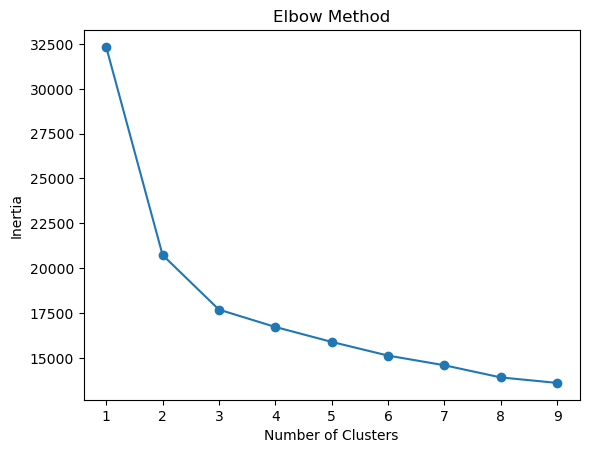

   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Widow  \
0              172                88            88  ...              0   
1                2                 1             6  ...              0   
2              111                21            42  ...              0   
3               10                 3             5  ...              0   
4               46                27            15  ...              0   

   education_2n Cycle  education_Basic  education_Graduation  \
0               

C:\Users\chara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(1, 10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal clusters (e.g., 4 based on the Elbow Curve) and fit K-means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_features)

# Verify clusters are added correctly
print(df.head())


   Cluster        Income     MntTotal    Recency  NumWebPurchases  \
0        0  34065.639233    89.025930  49.233371         2.022548   
1        1  62710.241304   859.369565  48.969565         6.339130   
2        2  77130.196796  1459.258581  48.675057         5.032037   
3        3  49329.624473   490.345992  47.767932         5.940928   

   NumStorePurchases  NumWebVisitsMonth  
0           3.162345           6.414882  
1           8.373913           4.869565  
2           8.414188           2.659039  
3           5.919831           7.177215  


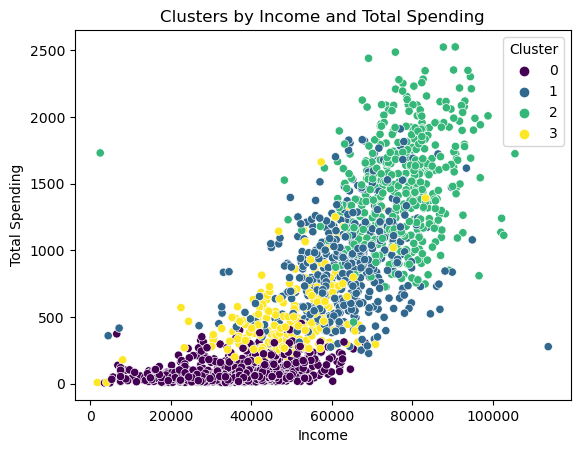

In [4]:
import seaborn as sns

# Cluster summary
cluster_summary = df.groupby('Cluster').agg({
    'Income': 'mean',
    'MntTotal': 'mean',
    'Recency': 'mean',
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'NumWebVisitsMonth': 'mean'
}).reset_index()

print(cluster_summary)

# Visualization: Scatter plot of clusters
sns.scatterplot(data=df, x='Income', y='MntTotal', hue='Cluster', palette='viridis')
plt.title('Clusters by Income and Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.legend(title='Cluster')
plt.show()


In [5]:
# Example of profiling clusters
for cluster_id in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} Profile:")
    print(f"Average Income: {cluster_data['Income'].mean():.2f}")
    print(f"Average Total Spending: {cluster_data['MntTotal'].mean():.2f}")
    print(f"Average Recency: {cluster_data['Recency'].mean():.2f}")

# Example recommendations
# 1. High spenders: Reward loyalty with exclusive offers.
# 2. Frequent low spenders: Encourage larger purchases via bundle discounts.
# 3. Low-frequency, low-spenders: Re-engage with targeted promotions.



Cluster 2 Profile:
Average Income: 77130.20
Average Total Spending: 1459.26
Average Recency: 48.68

Cluster 0 Profile:
Average Income: 34065.64
Average Total Spending: 89.03
Average Recency: 49.23

Cluster 1 Profile:
Average Income: 62710.24
Average Total Spending: 859.37
Average Recency: 48.97

Cluster 3 Profile:
Average Income: 49329.62
Average Total Spending: 490.35
Average Recency: 47.77
